#### This project entails conducting sentiment analysis for a Women's E-commerce clothing platform. Initially, the focus was on cleaning the review columns, involving the elimination of stopwords in English and stemming using PorterStemmer. To visualize the corpus, Wordcloud was employed, while TextBlob aided in determining the polarity of reviews, categorizing them into positive, negative, and neutral sentiments. Finally, Bag of Words via CountVectorizer was utilized for further analysis.
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/code?datasetId=11827&sortBy=voteCount&searchQuery=NLtk

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing essential libraries for performing Natural Language Processing on review
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#!pip install wordcloud
from wordcloud import WordCloud

#!pip install textblob
#Polarity
from textblob import TextBlob


#For Bag of words
#import nltk
#nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df=pd.read_csv('C:/Users/Shai/OneDrive/Documents/Data science/Women E-commerce Product review/Womens Clothing E-Commerce Reviews.csv', index_col=0)
print(df.shape)
df.head()

(23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


### Data Preparation

<AxesSubplot:xlabel='Rating', ylabel='count'>

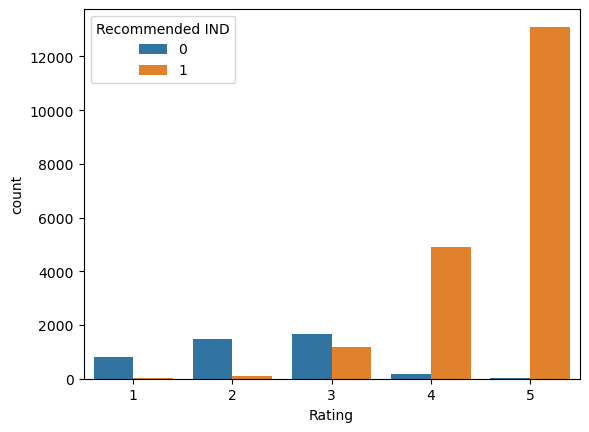

In [6]:
sns.countplot(data=df, x='Rating', hue='Recommended IND')

In [7]:
#Focus on the necessary columns
df_review= df[['Title', 'Review Text', 'Recommended IND', 'Rating']]
df_review.head()

,Title,Review Text,Recommended IND,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,1,4
1,NaN,Love this dress! it's sooo pretty. i happene...,1,5
2,Some major design flaws,I had such high hopes for this dress and reall...,0,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,5
4,Flattering shirt,This shirt is very flattering to all due to th...,1,5


In [8]:
#Merge the Title and Review Text
df_review['Review'] = df_review['Title'] + ' ' + df_review['Review Text']
df_review = df_review.drop(labels=['Title','Review Text'] , axis=1)
df_review = df_review.rename(columns={"Recommended IND": "Is_Recommended"})
df_review.head()

C:\Users\Shai\AppData\Local\Temp\ipykernel_24308\162031079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Review'] = df_review['Title'] + ' ' + df_review['Review Text']


,Is_Recommended,Rating,Review
0,1,4,NaN
1,1,5,NaN
2,0,3,Some major design flaws I had such high hopes ...
3,1,5,"My favorite buy! I love, love, love this jumps..."
4,1,5,Flattering shirt This shirt is very flattering...


In [9]:
df_review.Review.isna().sum()

3811

In [10]:
df_review.dropna(inplace=True)
df_review.shape

(19675, 3)

In [11]:
df_review['Is_Recommended'].value_counts(normalize=True)

1    0.818297
0    0.181703
Name: Is_Recommended, dtype: float64

### EDA

In [12]:
#There's imbalance with the target variable
#New column for count of text
df_review['Review_Length'] = df_review['Review'].apply(len)
df_review.head()

,Is_Recommended,Rating,Review,Review_Length
2,0,3,Some major design flaws I had such high hopes ...,524
3,1,5,"My favorite buy! I love, love, love this jumps...",141
4,1,5,Flattering shirt This shirt is very flattering...,209
5,0,2,Not for the very petite I love tracy reese dre...,512
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517


C:\Users\Shai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Review_Length', ylabel='Density'>

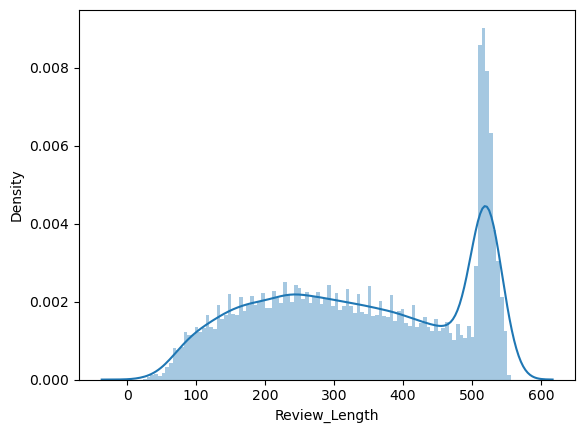

In [13]:
sns.distplot(df_review['Review_Length'], hist=True,bins=100)

C:\Users\Shai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


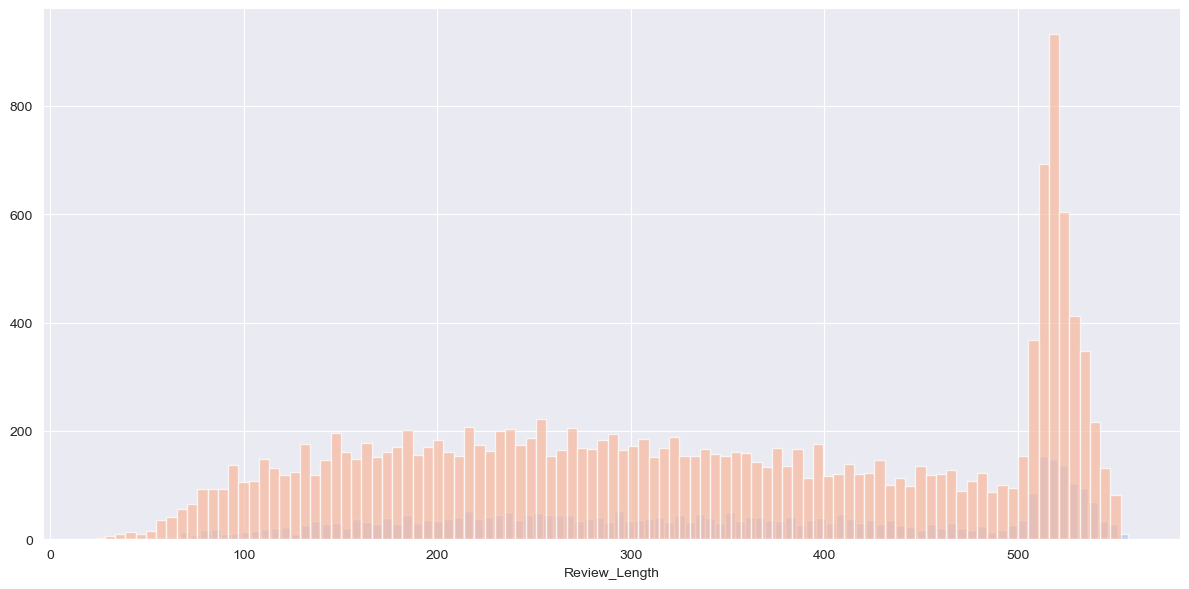

In [14]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df_review,hue="Is_Recommended",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Review_Length',bins=100,alpha=0.7)

### Modeling

In [15]:
X=df_review['Review']

stop_words = stopwords.words('english')
stemmer=PorterStemmer()

# Cleaning the reviews
cleaned_review = []
for i in range(len(X)):

    #Cleaning special character from the reviews
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=X.iloc[i])
    #Converting the entire review into lower case then tokenizing by words
    review = review.lower().split()
    #Removing the stop words and then stemming the words
    review = [stemmer.stem(word) for word in review if (word not in stop_words)]
    #Joining the stemmed words
    review = ' '.join(review)
    #Cleaning number character from the reviews
    review = re.sub(pattern='\d+', repl=' ', string=X.iloc[i]) 
    
    #Remove characters which have length less than 2  
    #review = [word for word in review if len(word) > 2]
    
    #Creating a corpus
    cleaned_review.append(review)


In [16]:
df_review['Cleaned_Review'] = pd.DataFrame(cleaned_review)
df_review.head()

,Is_Recommended,Rating,Review,Review_Length,Cleaned_Review
2,0,3,Some major design flaws I had such high hopes ...,524,Flattering shirt This shirt is very flattering...
3,1,5,"My favorite buy! I love, love, love this jumps...",141,Not for the very petite I love tracy reese dre...
4,1,5,Flattering shirt This shirt is very flattering...,209,Cagrcoal shimmer fun I aded this in my basket ...
5,0,2,Not for the very petite I love tracy reese dre...,512,"Shimmer, surprisingly goes with lots I ordered..."
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,Flattering I love this dress. i usually get an...


In [17]:
X = df_review['Review']
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

cleaned_review = []

for i in range(len(X)):
    review = X.iloc[i]
    
    # Cleaning special characters from the reviews
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=review)
    
    # Converting the entire review into lower case then tokenizing by words
    review = review.lower().split()
    
    # Removing the stop words and then stemming the words
    review = [stemmer.stem(word) for word in review if (word not in stop_words)]
    
    # Joining the stemmed words
    review = ' '.join(review)
    
    # Cleaning number characters from the reviews
    review = re.sub(pattern='\d+', repl=' ', string=review)
    
    # Remove characters which have length less than 2
    #review = [word for word in review.split() if len(word) > 2]
    
    # Appending cleaned review to the list
    cleaned_review.append(review)

In [18]:
df_review['Cleaned_Review'] = pd.DataFrame(cleaned_review)
df_review.head()

,Is_Recommended,Rating,Review,Review_Length,Cleaned_Review
2,0,3,Some major design flaws I had such high hopes ...,524,flatter shirt shirt flatter due adjust front t...
3,1,5,"My favorite buy! I love, love, love this jumps...",141,petit love traci rees dress one petit feet tal...
4,1,5,Flattering shirt This shirt is very flattering...,209,cagrcoal shimmer fun ade basket hte last mintu...
5,0,2,Not for the very petite I love tracy reese dre...,512,shimmer surprisingli goe lot order carbon stor...
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,flatter love dress usual get xs run littl snug...


In [19]:
def wc(data,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = 'white', max_words = 1000,  max_font_size = 50, colormap='gist_heat')
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

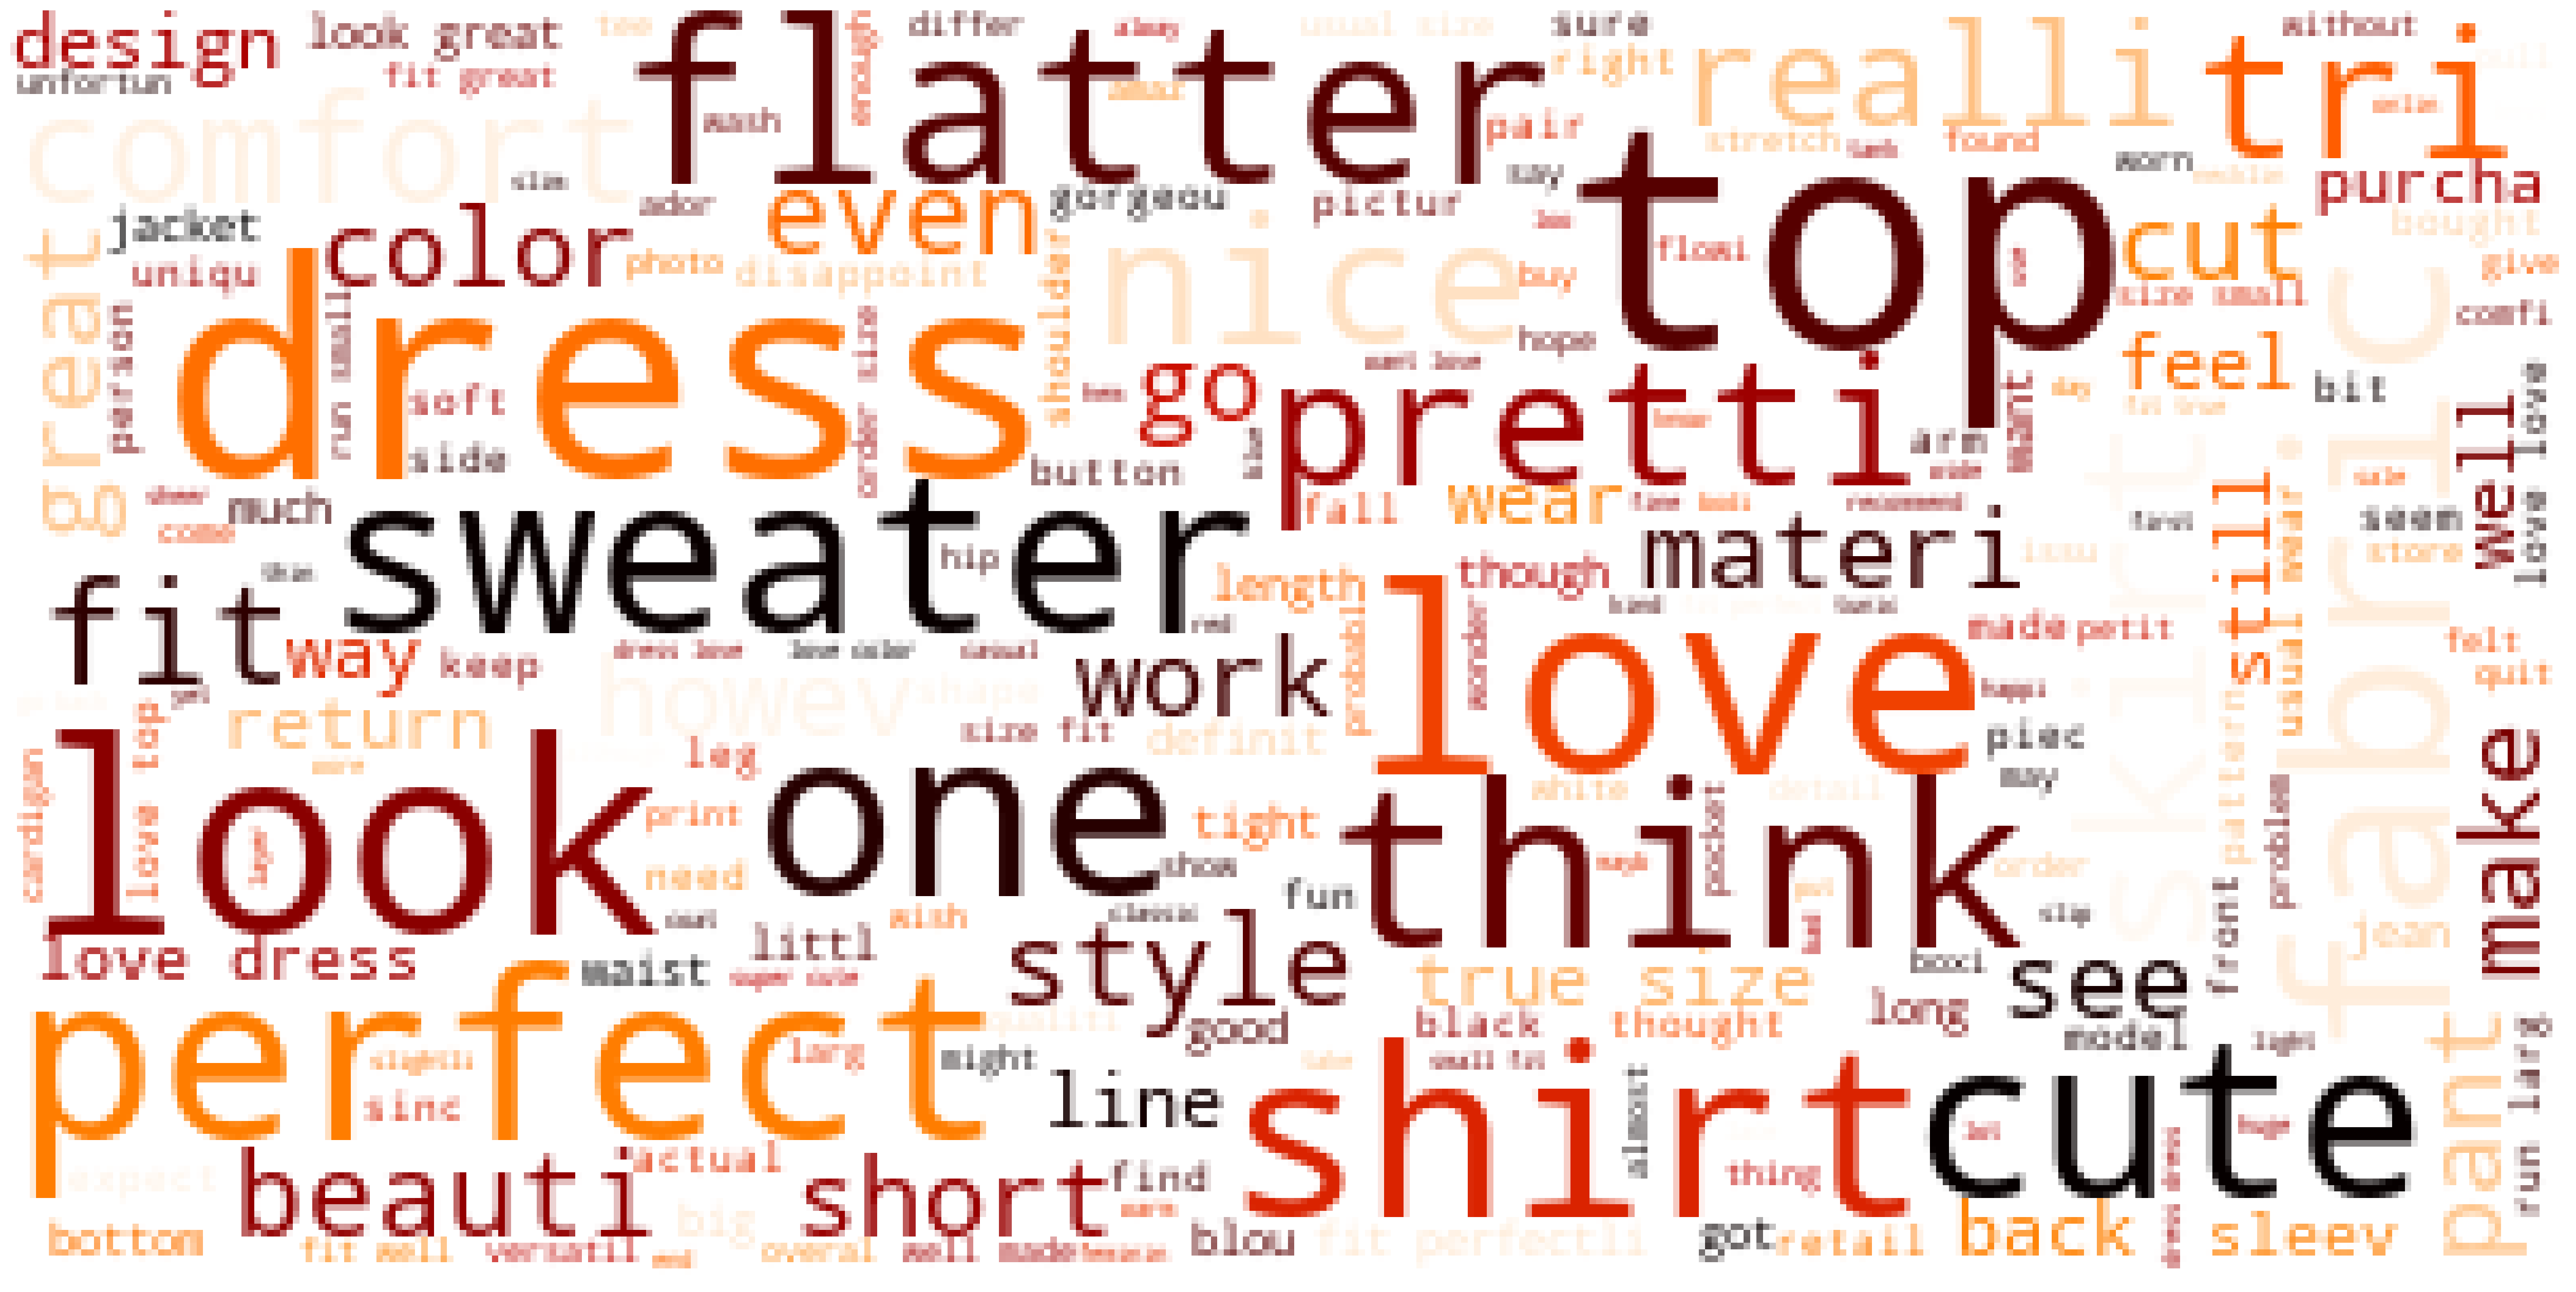

In [20]:
wc(cleaned_review,'Most Used Words')

In [21]:
df_review['Cleaned_Review'] = df_review['Cleaned_Review'].astype(str)

In [22]:
df_review['Polarity'] = df_review['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_review.head(5)

,Is_Recommended,Rating,Review,Review_Length,Cleaned_Review,Polarity
2,0,3,Some major design flaws I had such high hopes ...,524,flatter shirt shirt flatter due adjust front t...,0.458333
3,1,5,"My favorite buy! I love, love, love this jumps...",141,petit love traci rees dress one petit feet tal...,0.085714
4,1,5,Flattering shirt This shirt is very flattering...,209,cagrcoal shimmer fun ade basket hte last mintu...,0.030000
5,0,2,Not for the very petite I love tracy reese dre...,512,shimmer surprisingli goe lot order carbon stor...,0.241667
6,1,5,Cagrcoal shimmer fun I aded this in my basket ...,517,flatter love dress usual get xs run littl snug...,0.000000


In [23]:
df_review['Sentiment_Type'] = np.where(df_review['Polarity'] > 0, "Positive Review", np.where(df_review['Polarity'] < 0, "Negative Review", "Neutral Review"))

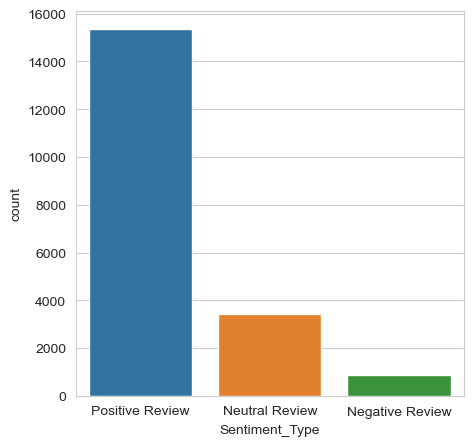

In [24]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_review)

In [25]:
positive_reviews = df_review.loc[df_review['Sentiment_Type'] == 'Positive Review'].copy()
negative_reviews = df_review.loc[df_review['Sentiment_Type'] == 'Negative Review'].copy()
neutral_reviews = df_review.loc[df_review['Sentiment_Type'] == 'Neutral Review'].copy()

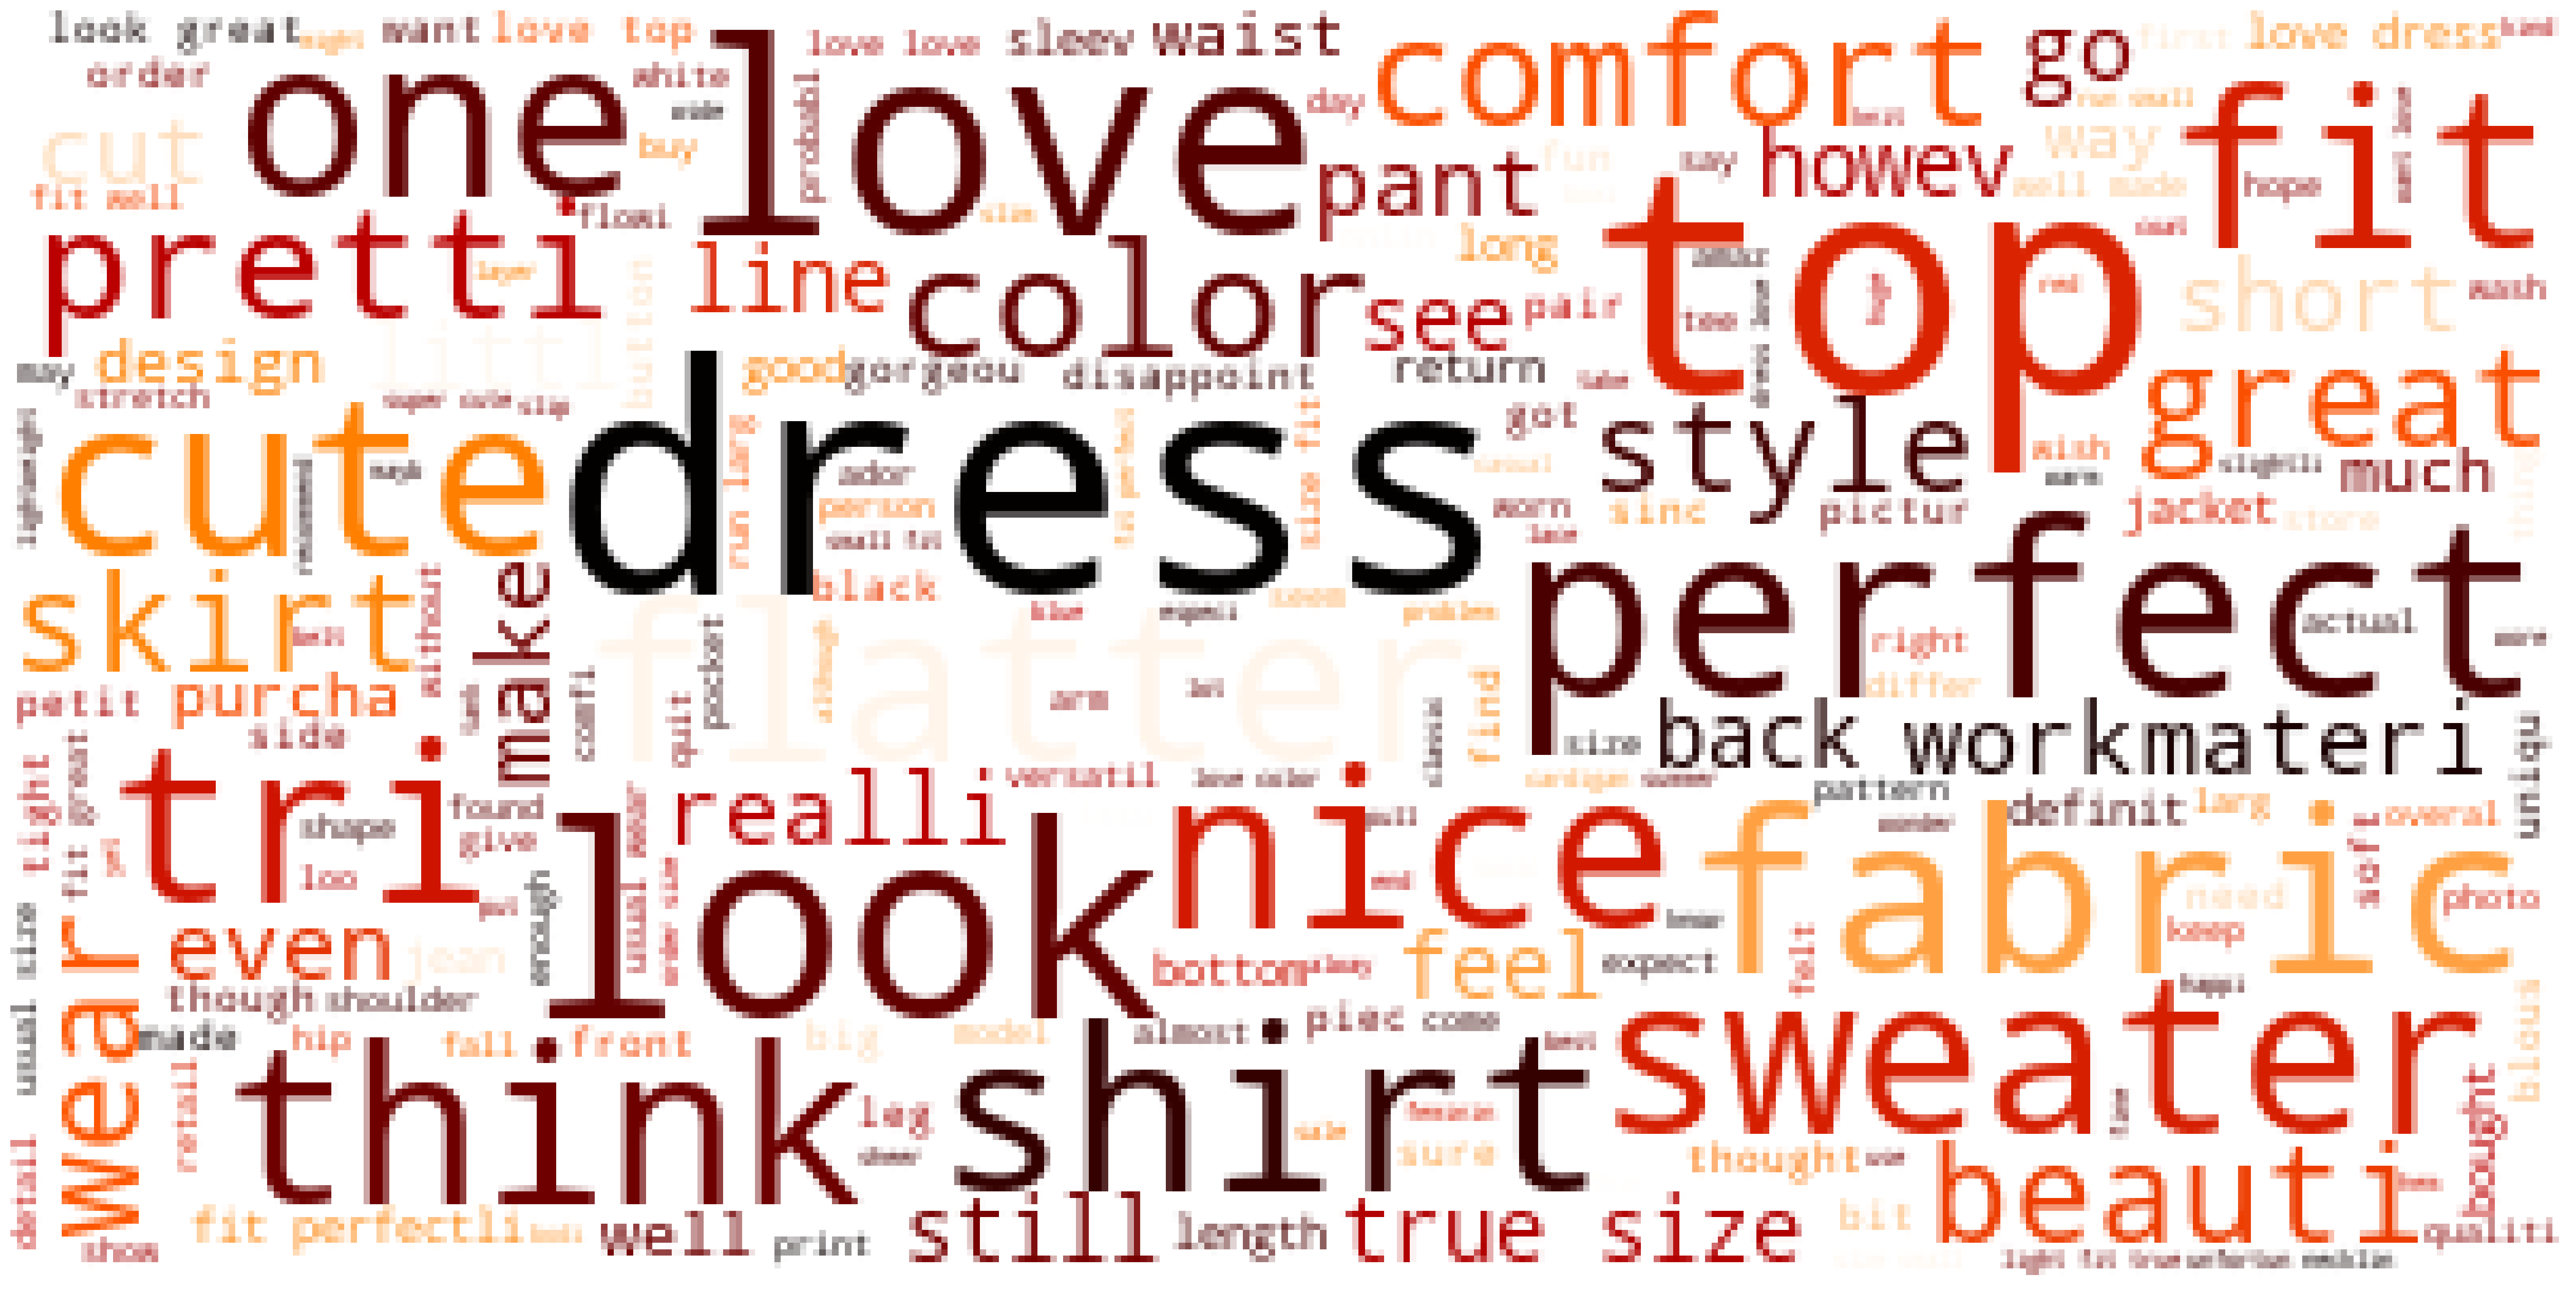

In [26]:
wc(positive_reviews['Cleaned_Review'],'Most Used Words')

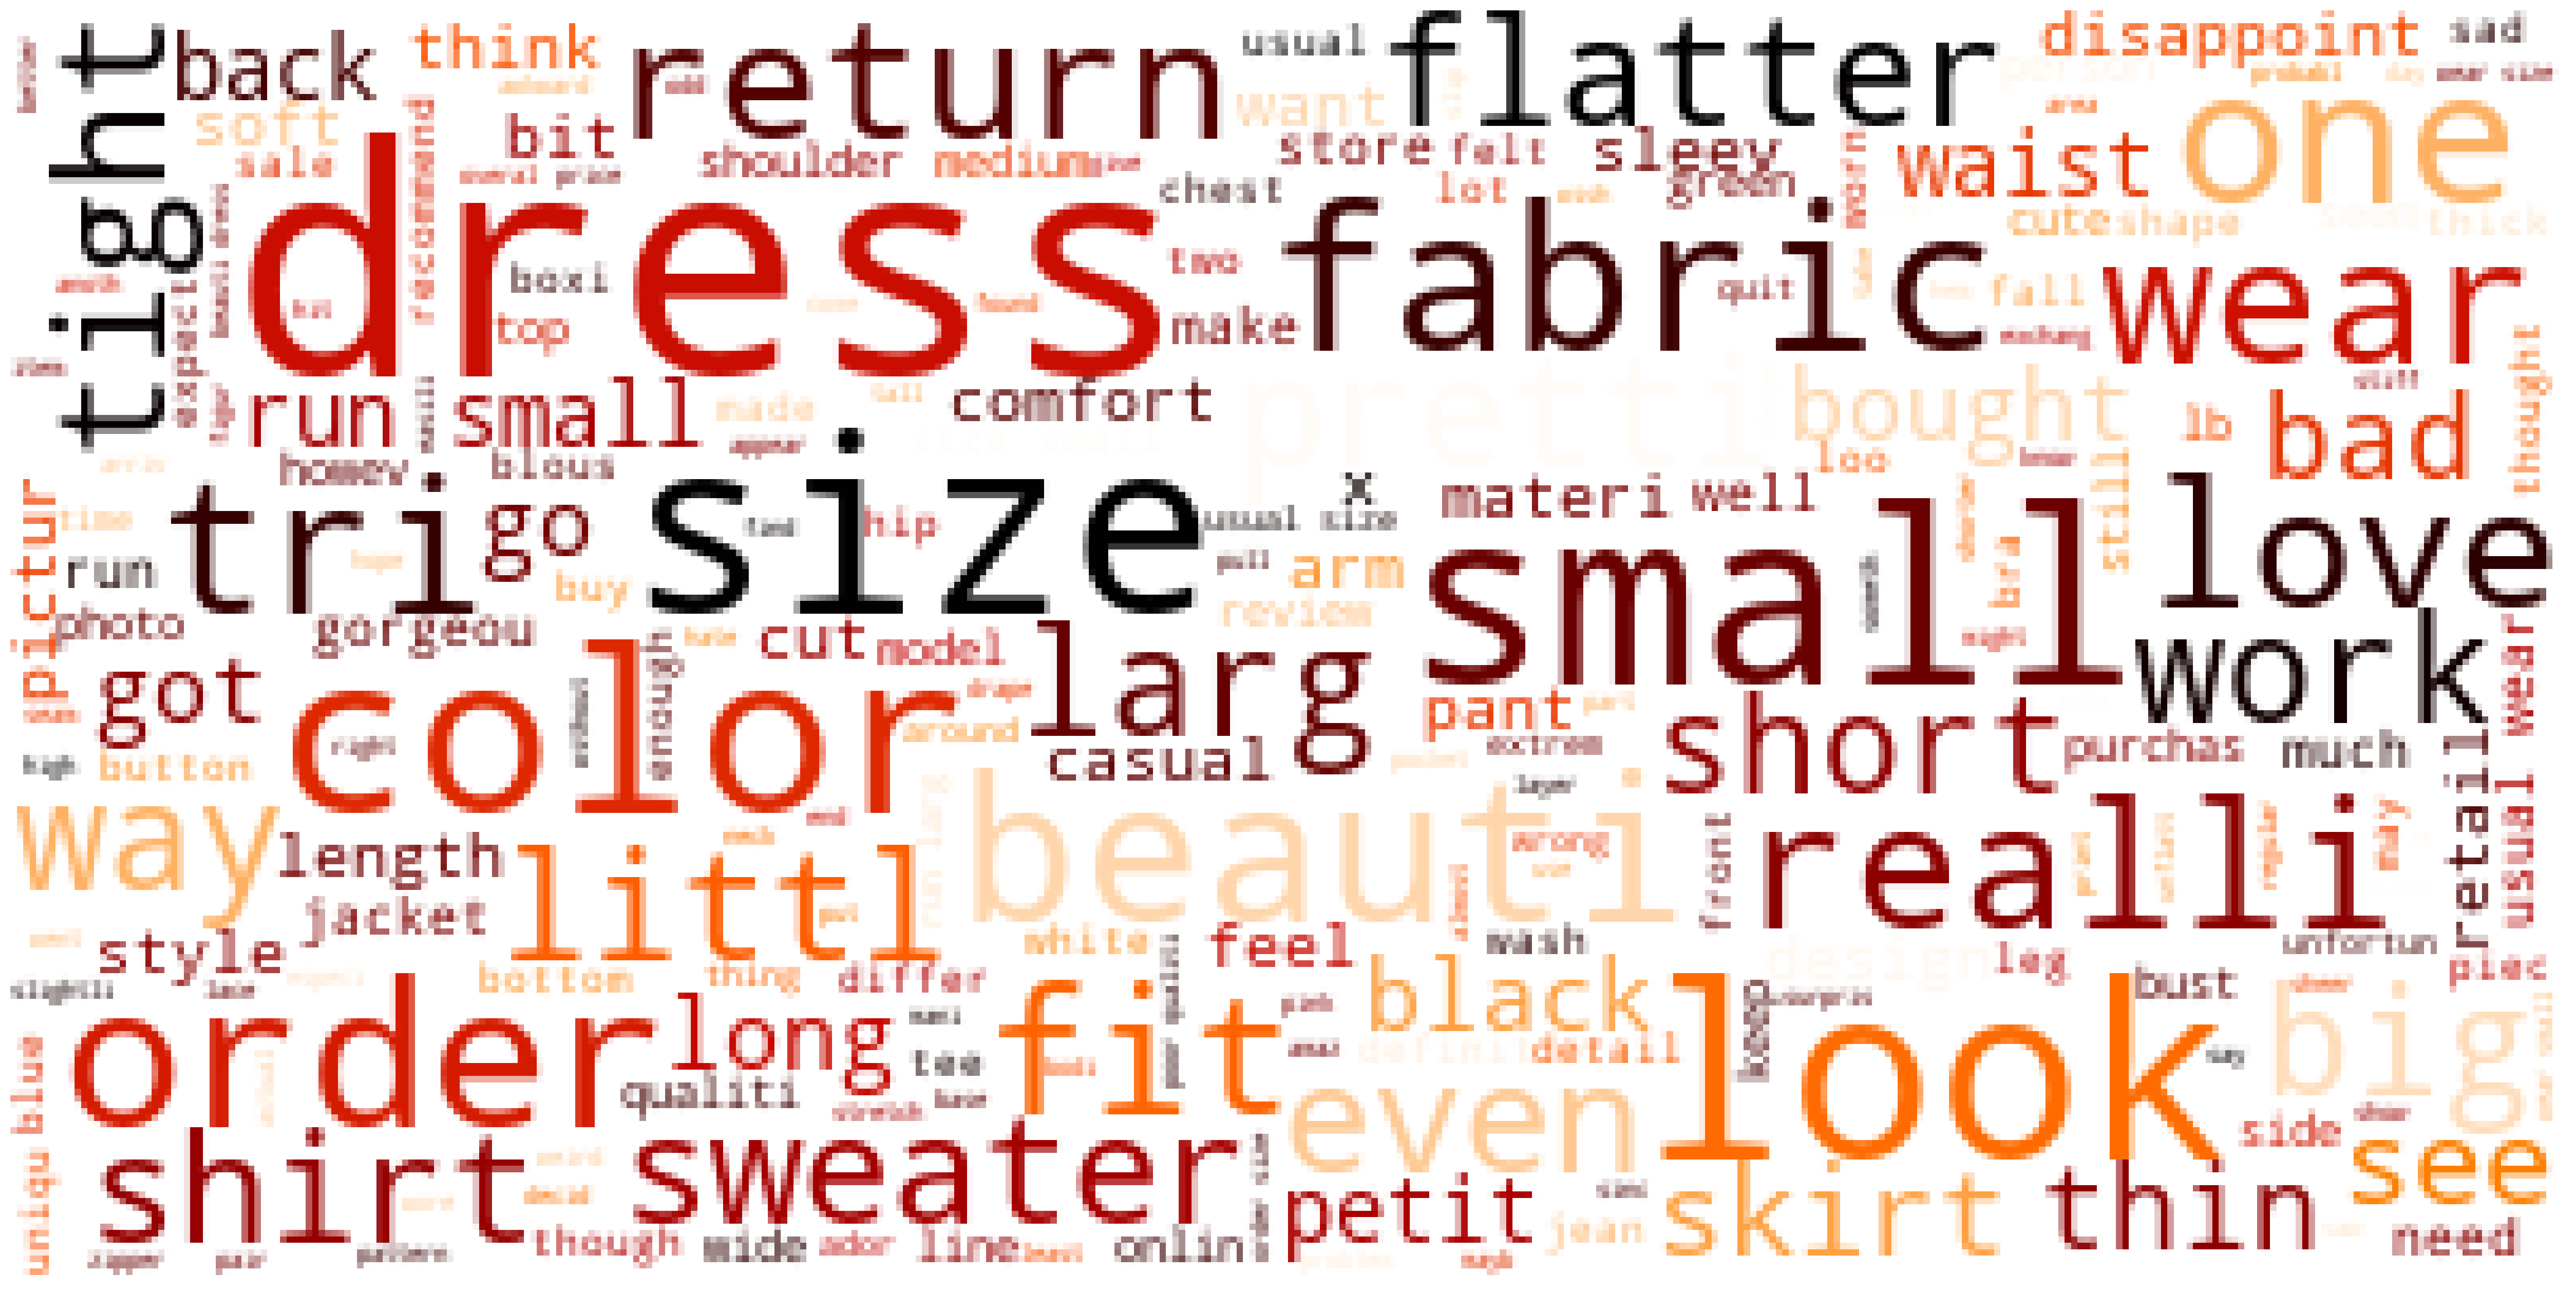

In [27]:
wc(negative_reviews['Cleaned_Review'],'Most Used Words')

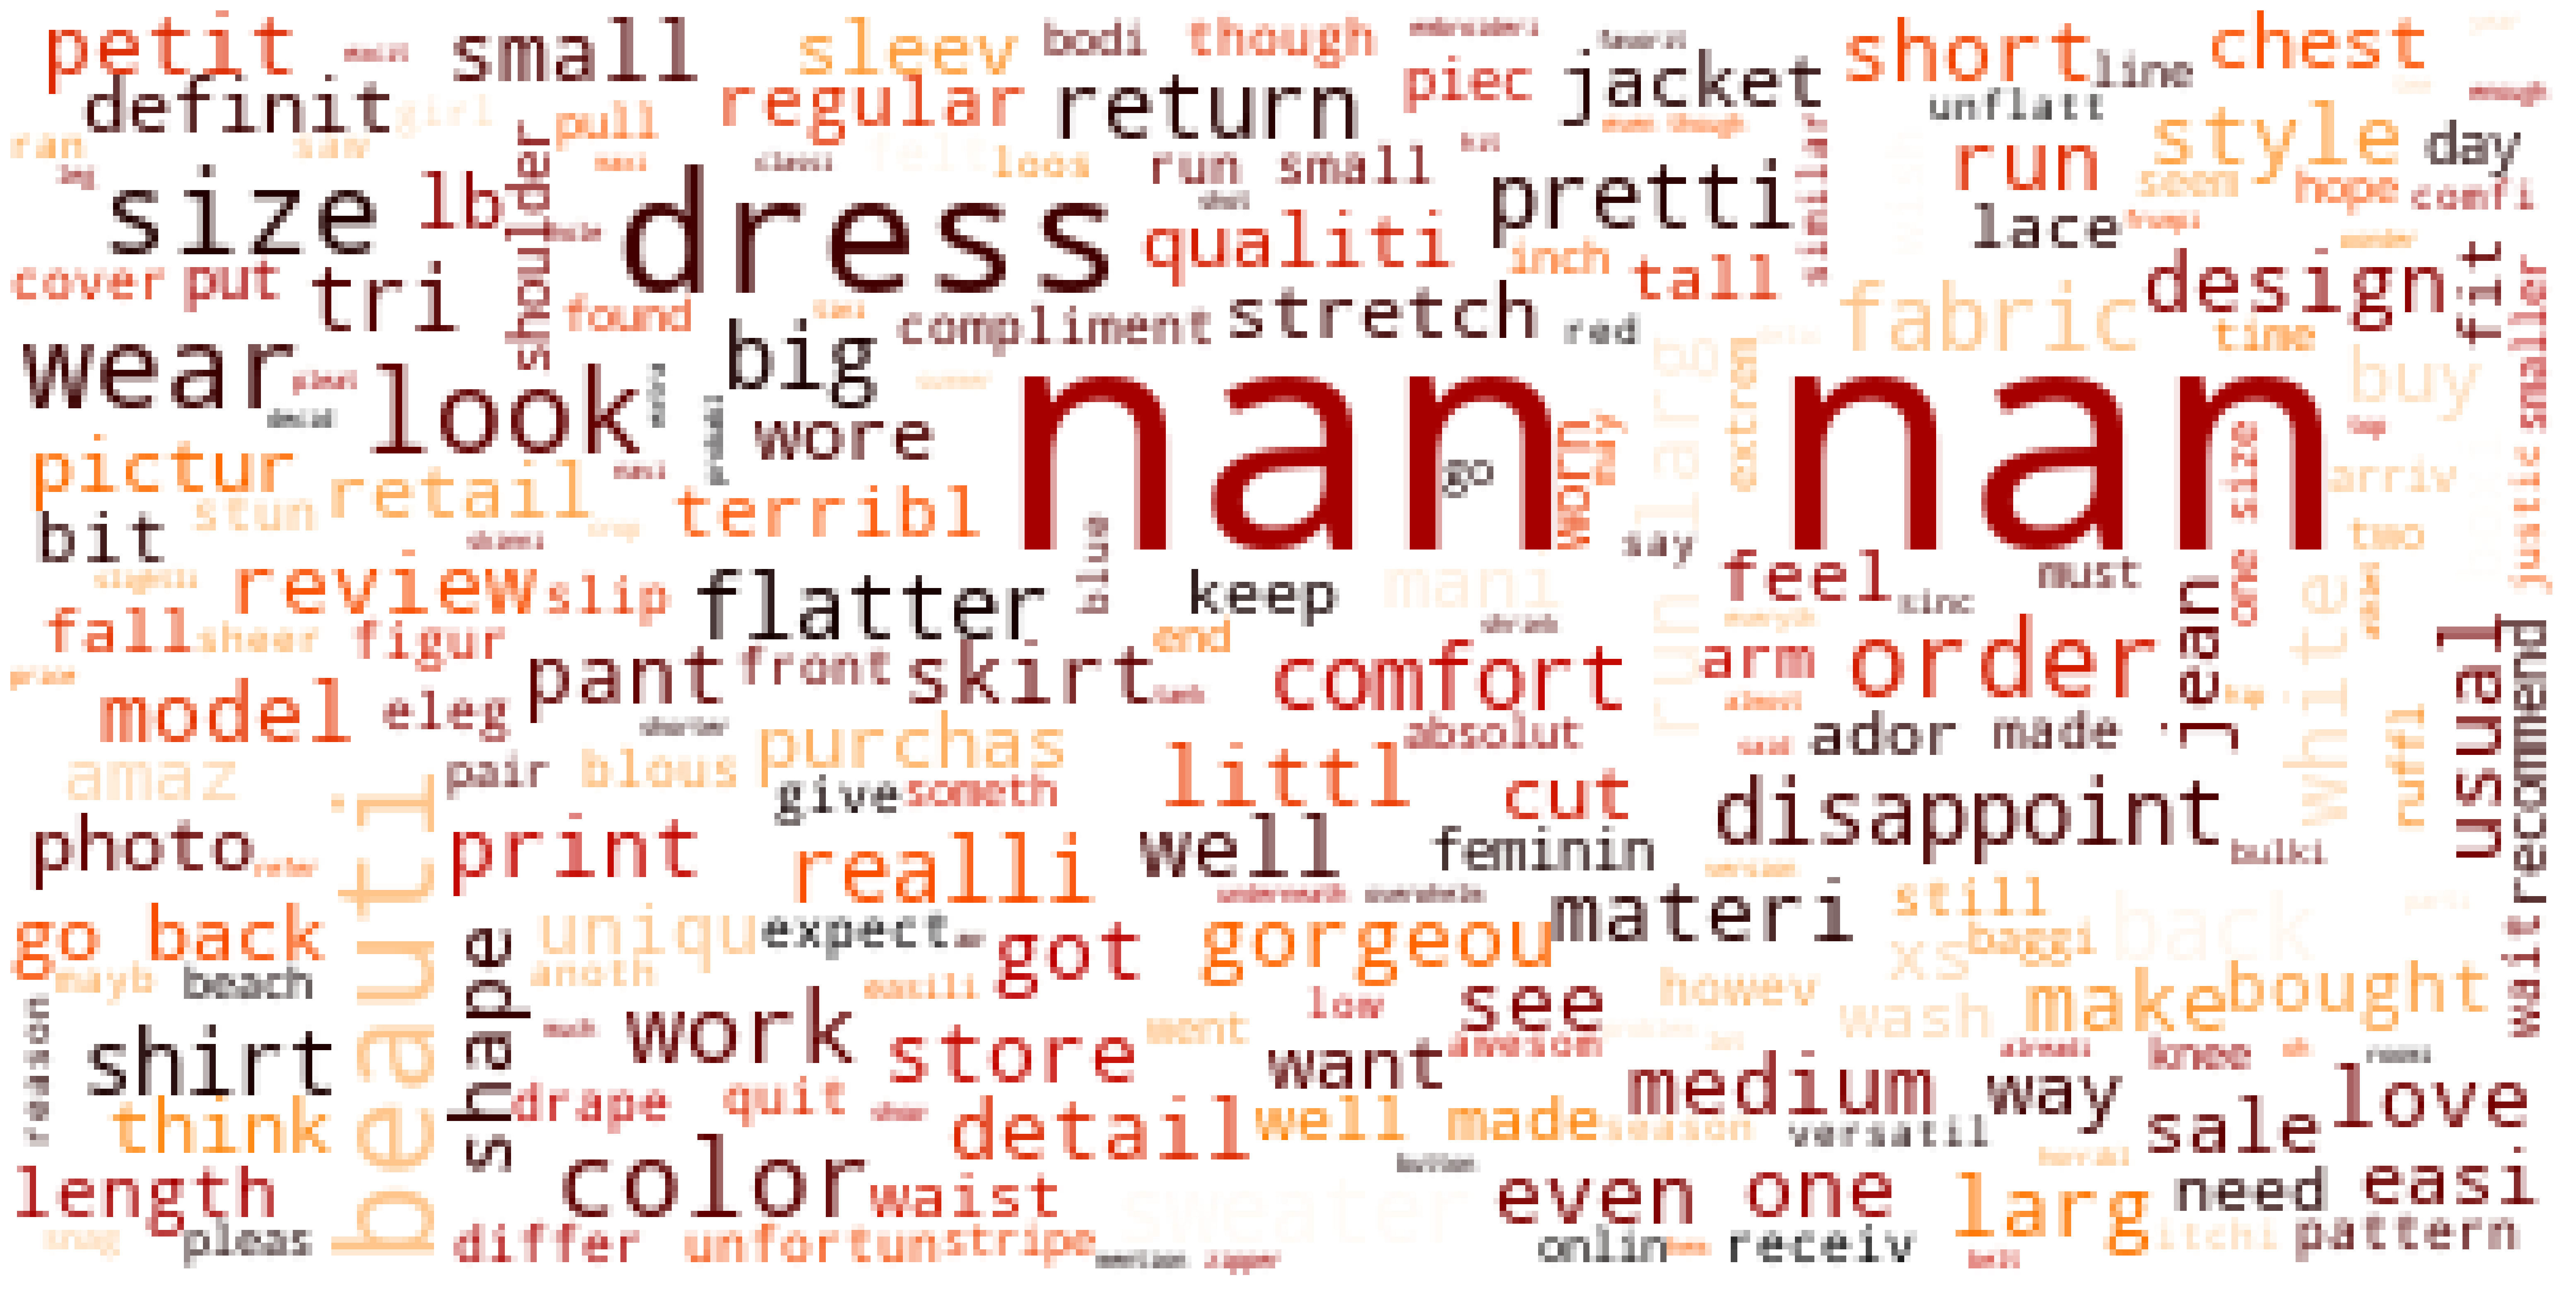

In [28]:
wc(neutral_reviews['Cleaned_Review'],'Most Used Words')

### Bag of words

A bag of words (BoW) is a representation of text data that describes the occurrence of words within a document. It disregards grammar and word order, focusing only on the presence and frequency of words.

In [29]:
# Define your list of clothes as stopwords
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

# Function to remove stopwords and tokenize the text
def stopwords_removal(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.lower() not in clothes_list]
    return ' '.join(tokens)

# Apply stopwords removal to 'Cleaned_Review' column
df_review['Cleaned_Review'] = df_review['Cleaned_Review'].apply(stopwords_removal)

# Now, create bag of words
cv = CountVectorizer(max_features=3000)
X_bag_of_words = cv.fit_transform(df_review['Cleaned_Review']).toarray()

# Get feature names and their frequencies
feature_names = cv.get_feature_names_out()

# Count word frequencies
word_frequencies = X_bag_of_words.sum(axis=0)

# Create a DataFrame to combine feature names and their frequencies
features_df = pd.DataFrame({'Feature': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
sorted_features_df = features_df.sort_values(by='Frequency', ascending=False)

# Print the sorted feature names along with their frequencies
print(sorted_features_df.head(10))


      Feature  Frequency
1492     love      10251
967       fit       9295
2303     size       8333
1479     look       7193
1454     like       6151
1141    great       5894
2338    small       3844
2959    would       3820
198    beauti       3709
1829  perfect       3576


In [30]:
# Positive reviews only
# Define your list of clothes as stopwords
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

# Function to remove stopwords and tokenize the text
def stopwords_removal(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.lower() not in clothes_list]
    return ' '.join(tokens)

# Apply stopwords removal to 'Cleaned_Review' column in positive_reviews dataframe
positive_reviews['Cleaned_Review'] = positive_reviews['Cleaned_Review'].apply(stopwords_removal)

# Create bag of words
cv = CountVectorizer(max_features=3000)
X_bag_of_words = cv.fit_transform(positive_reviews['Cleaned_Review']).toarray()

# Get feature names and their frequencies
feature_names = cv.get_feature_names_out()

# Count word frequencies
word_frequencies = X_bag_of_words.sum(axis=0)

# Create a DataFrame to combine feature names and their frequencies
features_df = pd.DataFrame({'Feature': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
sorted_features_df = features_df.sort_values(by='Frequency', ascending=False)

# Print the sorted feature names along with their frequencies
print(sorted_features_df.head(10))

      Feature  Frequency
1482     love      10082
956       fit       9094
2300     size       7735
1468     look       6785
1123    great       5876
1443     like       5709
2959    would       3584
1829  perfect       3571
641      cute       3431
193    beauti       3393


In [31]:
#Negative reviews only
# Define your list of clothes as stopwords
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

# Function to remove stopwords and tokenize the text
def stopwords_removal(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.lower() not in clothes_list]
    return ' '.join(tokens)

# Apply stopwords removal to 'Cleaned_Review' column in negative_reviews dataframe
negative_reviews['Cleaned_Review'] = negative_reviews['Cleaned_Review'].apply(stopwords_removal)

# Create bag of words
cv = CountVectorizer(max_features=3000)
X_bag_of_words = cv.fit_transform(negative_reviews['Cleaned_Review']).toarray()

# Get feature names and their frequencies
feature_names = cv.get_feature_names_out()

# Count word frequencies
word_frequencies = X_bag_of_words.sum(axis=0)

# Create a DataFrame to combine feature names and their frequencies
features_df = pd.DataFrame({'Feature': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
sorted_features_df = features_df.sort_values(by='Frequency', ascending=False)

# Print the sorted feature names along with their frequencies
print(sorted_features_df.head(10))

     Feature  Frequency
2132   small        548
2093    size        537
1300    like        375
1326    look        350
1927     run        238
190   beauti        234
2537   usual        214
2668   would        209
871      fit        192
1554     one        189


In [32]:
# Neutral reviews only
# Define your list of clothes as stopwords
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

# Function to remove stopwords and tokenize the text
def stopwords_removal(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.lower() not in clothes_list]
    return ' '.join(tokens)

# Apply stopwords removal to 'Cleaned_Review' column in neutral_reviews dataframe
neutral_reviews['Cleaned_Review'] = neutral_reviews['Cleaned_Review'].apply(stopwords_removal)
# Create bag of words
cv = CountVectorizer(max_features=3000)
X_bag_of_words = cv.fit_transform(neutral_reviews['Cleaned_Review']).toarray()

# Get feature names and their frequencies
feature_names = cv.get_feature_names_out()

# Count word frequencies
word_frequencies = X_bag_of_words.sum(axis=0)

# Create a DataFrame to combine feature names and their frequencies
features_df = pd.DataFrame({'Feature': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
sorted_features_df = features_df.sort_values(by='Frequency', ascending=False)

# Print the sorted feature names along with their frequencies
print(sorted_features_df.head(10))

      Feature  Frequency
569       nan       3194
82     beauti         82
496      like         67
815      size         61
506      look         58
754       run         37
1031     work         36
69       back         34
182   comfort         33
688    pretti         31
